In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import re

import math

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score


import scipy.stats as scs
import statsmodels.api as sm


%matplotlib inline

## Read in the Data

In [2]:
stockx_data = pd.read_csv('/Users/brandonmojica/Desktop/Galvanize/Capstones/Capstone_2/stockx_price_predict/data/StockX-Data-2019.csv')

### Quick Look at the Data

There are 99956 total records in this dataset, that also contains 8 features. 

In [3]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,"$1,097",$220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,$685,$220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,$690,$220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,"$1,075",$220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,$828,$220,2/11/17,11.0,Rhode Island


In [4]:
stockx_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99956 entries, 0 to 99955
Data columns (total 8 columns):
Order Date      99956 non-null object
Brand           99956 non-null object
Sneaker Name    99956 non-null object
Sale Price      99956 non-null object
Retail Price    99956 non-null object
Release Date    99956 non-null object
Shoe Size       99956 non-null float64
Buyer Region    99956 non-null object
dtypes: float64(1), object(7)
memory usage: 6.1+ MB


## Data Cleaning

### Pt 1: Remove the dollar signs from the columns sale price and retial price

In [5]:
def remove_unwanted_chars(string):
    
    """
    Inputs: string
    
    Description: A function that removes the "$" and "," and converts the string into an integer

    Returns: int
    
    """
    string = string.strip('$')
    string = string.replace(',','')
    string = int(string)
    
    return string

In [6]:
#Use the function remove_unwanted_chars to remove $ and , 
stockx_data['Retail Price'] = stockx_data['Retail Price'].apply(remove_unwanted_chars)
stockx_data['Sale Price'] = stockx_data['Sale Price'].apply(remove_unwanted_chars)

In [7]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,9/24/16,11.0,California
1,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,11/23/16,11.0,California
2,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,11/23/16,11.0,California
3,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,11/23/16,11.5,Kentucky
4,9/1/17,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2/11/17,11.0,Rhode Island


In [8]:
#covert the order date and release Date to a datetime type. 
stockx_data['Order Date'] = stockx_data['Order Date'].astype('datetime64[ns]') 
stockx_data['Release Date'] = stockx_data['Release Date'].astype('datetime64[ns]') 

In [9]:
stockx_data.head()

,Order Date,Brand,Sneaker Name,Sale Price,Retail Price,Release Date,Shoe Size,Buyer Region
0,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-Low-V2-Beluga,1097,220,2016-09-24,11.0,California
1,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Copper,685,220,2016-11-23,11.0,California
2,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Green,690,220,2016-11-23,11.0,California
3,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red,1075,220,2016-11-23,11.5,Kentucky
4,2017-09-01,Yeezy,Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017,828,220,2017-02-11,11.0,Rhode Island


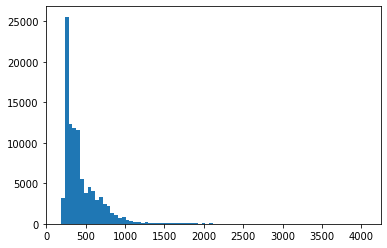

In [11]:
plt.hist(stockx_data['Sale Price'],bins=80)
plt.show()

In [12]:
stockx_data['log_sale_price'] = stockx_data['Sale Price'].apply(np.log)

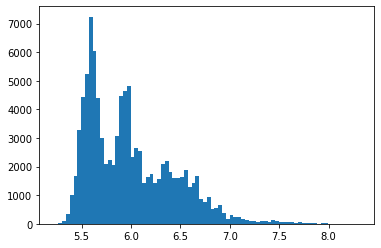

In [14]:
plt.hist(stockx_data['log_sale_price'],bins=80)
plt.show()